In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%load_ext autoreload

%autoreload 2
%matplotlib inline
train_path = '../../input/train.csv'
test_path = '../../input/test.csv'
question_path = '../../input/question.csv'
char_embed = "../../input/char_embed.txt"
word_embed = "../../input/word_embed.txt"

In [2]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
question_df = pd.read_csv(question_path)
word_embed_df = pd.read_csv(word_embed,delim_whitespace=True,index_col=0,header=None)
char_embed_df = pd.read_csv(char_embed,delim_whitespace=True,index_col=0,header=None)

In [3]:
question_df["word_len"] = question_df["words"].apply(lambda words:len(words.split(" ")))
question_df["char_len"] = question_df["chars"].apply(lambda chars:len(chars.split(" ")))

In [4]:
question_df.head(20)

,qid,words,chars,word_len,char_len
0,Q000000,W05733 W05284 W09158 W14968 W07863,L1128 L1861 L2218 L1796 L1055 L0847 L2927,5,7
1,Q000001,W17378 W17534 W03249 W01490 W18802,L2214 L1980 L0156 L1554 L2218 L1861 L3019 L010...,5,9
2,Q000002,W17378 W08158 W20171 W11246 W14759,L2214 L2350 L2568 L1969 L2168 L0694 L3012 L256...,5,9
3,Q000003,W11385 W14103 W02556 W13157 W09749,L0762 L2172 L1971 L2034 L2039 L2271 L1346 L223...,5,9
4,Q000004,W17508 W18238 W02952 W18103,L0018 L2321 L1346 L3019 L0104 L0902 L0354 L0362,4,8
5,Q000005,W17378 W12908 W19355 W08410 W11922 W14496 W20487,L2214 L1331 L0016 L1132 L2237 L1900 L0578 L195...,7,14
6,Q000006,W04346 W17378 W06112 W05733 W18238 W05284 W118...,L2323 L1526 L2214 L0358 L1849 L1128 L1861 L301...,8,13
7,Q000007,W16696 W02556 W16564 W03914 W18103,L0366 L2028 L2034 L2039 L0605 L1824 L2292 L015...,5,9
8,Q000008,W17378 W11385 W18238 W13157 W12244 W16319 W18448,L2214 L0762 L2172 L3019 L0104 L2271 L1346 L014...,7,11
9,Q000009,W14113 W16319 W18399 W03472 W11399 W07863 W18103,L0947 L2323 L2582 L0143 L2600 L2272 L1872 L123...,7,10


In [5]:
print "We have in total %s questions!"%question_df.shape[0]

We have in total 728428 questions!


#### Let us look at the distribution of word_len

In [5]:
question_df["word_len"].value_counts()

5     138033
6     126076
4     116563
7      96150
8      65982
3      60322
9      42445
10     26157
11     16186
2      13887
12      9728
13      5970
14      3652
15      2260
16      1405
17      1004
18       673
19       506
20       378
21       246
22       207
23       116
24       108
25        81
1         75
26        72
27        43
28        26
29        21
30        20
32        14
31        10
34         5
33         3
35         2
36         1
39         1
Name: word_len, dtype: int64

In [6]:
question_df["word_len"].describe()

count    728428.000000
mean          6.199064
std           2.567069
min           1.000000
25%           4.000000
50%           6.000000
75%           7.000000
max          39.000000
Name: word_len, dtype: float64

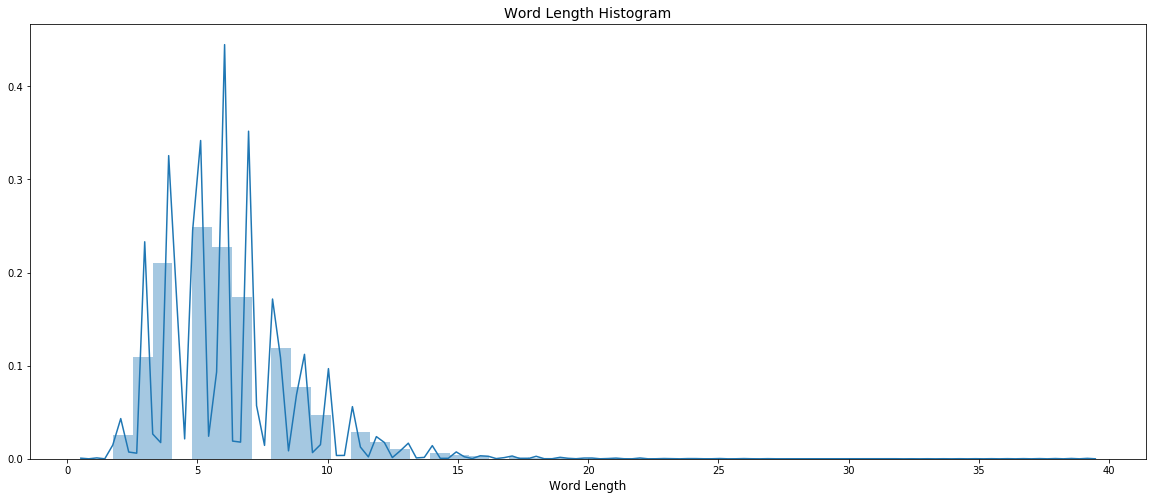

In [7]:
plt.figure(figsize=(20,8))
sns.distplot(question_df["word_len"])
plt.xlabel('Word Length', fontsize=12)
plt.title("Word Length Histogram", fontsize=14)
plt.show()

#### Let us look at the distribution of char_len

In [8]:
question_df["char_len"].describe()

count    728428.000000
mean         10.292577
std           3.918596
min           2.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          58.000000
Name: char_len, dtype: float64

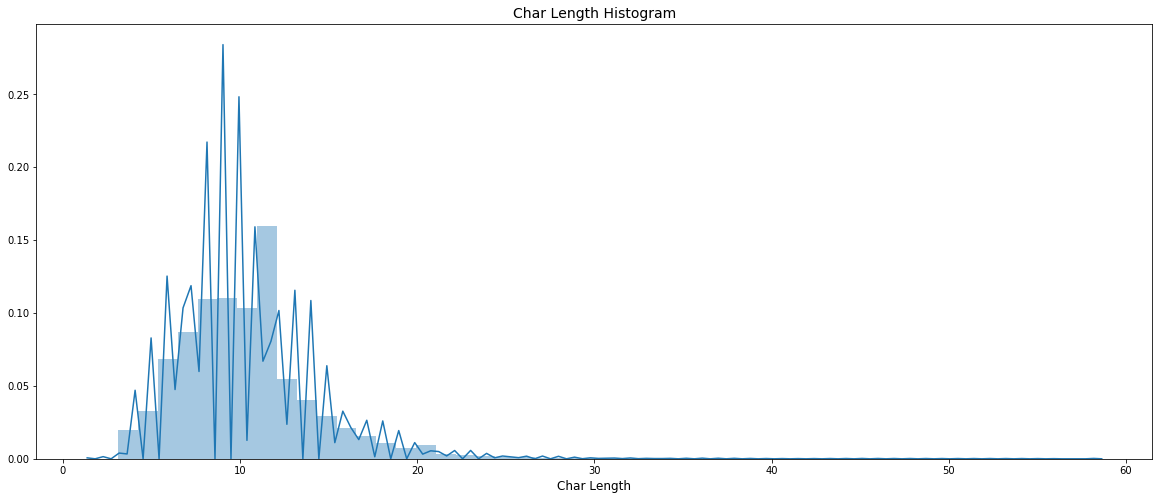

In [9]:
plt.figure(figsize=(20,8))
sns.distplot(question_df["char_len"])
plt.xlabel('Char Length', fontsize=12)
plt.title("Char Length Histogram", fontsize=14)
plt.show()

#### how many unique words and chars in all questions

In [10]:
all_words = question_df["words"].values.tolist()
all_words = ' '.join(all_words)
all_unique_words = set(all_words.split(" "))
print "number of unique words in all questions is %s"%(len(all_unique_words))

number of unique words in all questions is 20890


In [11]:
word_embed_df.shape[0]
## total unique words: 20891

20891

In [12]:
all_unique_words_index = map(lambda x:int(x[1:]),all_unique_words)
for i in range(20891):
    if i not in all_unique_words_index:
        print i
## word W03790 is not in the questions

3790


In [13]:
all_chars = question_df["chars"].values.tolist()
all_chars = ' '.join(all_chars)
all_unique_chars = set(all_chars.split(" "))
print "number of unique chars in all questions is %s"%(len(all_unique_chars))

number of unique chars in all questions is 3048


In [14]:
char_embed_df.shape[0]
## all letters(chars) occur in the questions

3048

## Word_length and pair length train and test

In [5]:
word_len_map = {}
char_len_map = {}
for i in range(question_df.shape[0]):
    row  = question_df.iloc[i]
    qid = row["qid"]
    word_len_map[qid] = row["word_len"]
    char_len_map[qid] = row["char_len"]

In [6]:

train_df["word_len_q1"] = train_df.apply(lambda row: word_len_map[row["q1"]],axis=1)
train_df["word_len_q2"] = train_df.apply(lambda row: word_len_map[row["q2"]],axis=1)
train_df["char_len_q1"] = train_df.apply(lambda row: char_len_map[row["q1"]],axis=1)
train_df["char_len_q2"] = train_df.apply(lambda row: char_len_map[row["q2"]],axis=1)
test_df["word_len_q1"] = test_df.apply(lambda row: word_len_map[row["q1"]],axis=1)
test_df["word_len_q2"] = test_df.apply(lambda row: word_len_map[row["q2"]],axis=1)
test_df["char_len_q1"] = test_df.apply(lambda row: char_len_map[row["q1"]],axis=1)
test_df["char_len_q2"] = test_df.apply(lambda row: char_len_map[row["q2"]],axis=1)

In [7]:
train_df.to_csv("train.csv",index=False)
test_df.to_csv("test.csv",index=False)

In [29]:
train_df.iloc[[1,4,5]]

,label,q1,q2,word_len_q1,word_len_q2,char_len_q1,char_len_q2
1,0,Q193805,Q699273,5,5,10,8
4,0,Q267714,Q290126,7,4,12,10
5,1,Q369715,Q658908,7,4,11,8


In [8]:
len_pair = list(zip(train_df["word_len_q1"],train_df["word_len_q2"]))
max_len_pair = map(max,len_pair)
pd.Series(max_len_pair).value_counts()

6     45504
7     44158
5     36104
8     34870
9     24637
4     19013
10    15660
11    10765
12     6752
3      4453
13     4098
14     2766
15     1902
16     1119
17     1048
2       327
18      309
19      304
20      195
21      154
22       65
25       54
24       28
23       24
26       22
27       10
39       10
30        9
34        9
28        8
32        5
31        2
29        1
35        1
dtype: int64

#### how many unique questions in train and test set

#### train set

In [15]:
train_df.head(5)

,label,q1,q2
0,1,Q397345,Q538594
1,0,Q193805,Q699273
2,0,Q085471,Q676160
3,0,Q189314,Q438123
4,0,Q267714,Q290126


In [16]:
train_df.shape[0]
## We have totally 254,386 train pairs, and 508772 questions in train set

254386

In [17]:
train_all_qids = pd.concat([train_df["q1"],train_df["q2"]],ignore_index=True)
print "number of questions in train set:%s" % train_all_qids.shape[0]

number of questions in train set:508772


In [18]:
train_ques_fre = train_all_qids.value_counts()
print "number of unique questions in train set:%s, out of %s, ratio is:%.2f%%"%(train_ques_fre.shape[0],question_df.shape[0],
                                                                              100*train_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in train set:192633, out of 728428, ratio is:26.45%


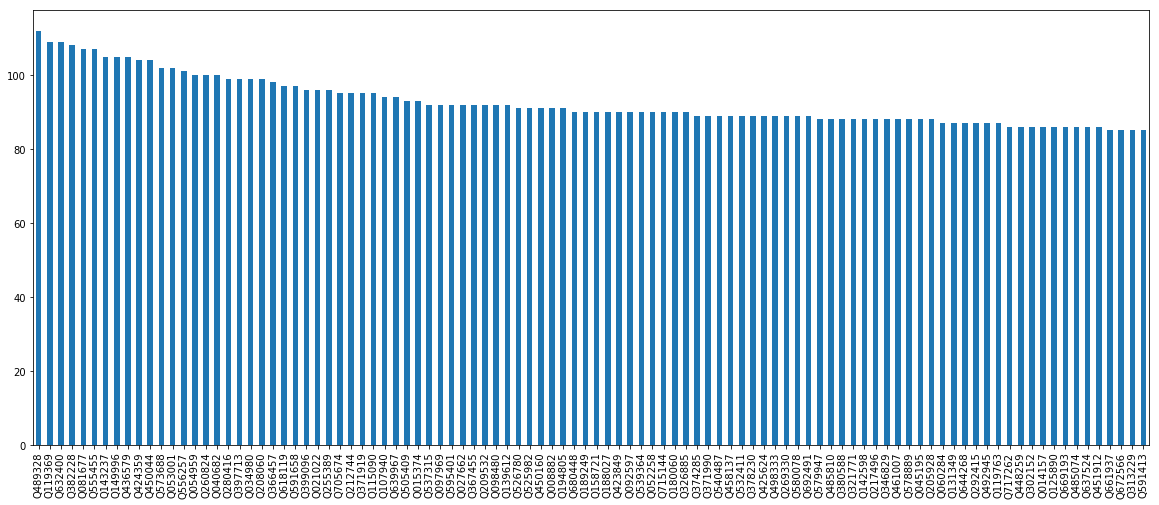

In [19]:
plt.figure(figsize=(20,8))
train_ques_fre.head(100).plot("bar")

In [20]:
train_ques_fre.describe()

count    192633.000000
mean          2.641147
std           6.092427
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         112.000000
dtype: float64

### test set

In [21]:
test_df.shape[0]
## ## We have totally 172,956 test pairs, and 345,912 questions in test set

172956

In [22]:
test_all_qids = pd.concat([test_df["q1"],test_df["q2"]],ignore_index=True)
print "number of questions in test set:%s" % test_all_qids.shape[0]

number of questions in test set:345912


In [23]:
test_ques_fre = test_all_qids.value_counts()
print "number of unique questions in test set:%s, out of %s, ratio is:%.2f%%"%(test_ques_fre.shape[0],question_df.shape[0],
                                                                              100*test_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in test set:248773, out of 728428, ratio is:34.15%


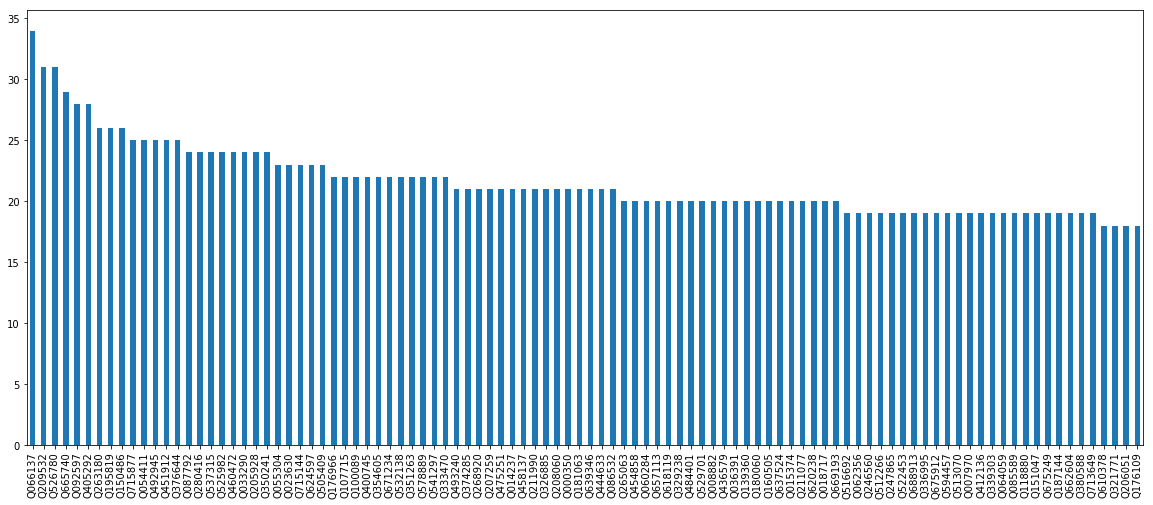

In [24]:
plt.figure(figsize=(20,8))
test_ques_fre.head(100).plot("bar")

In [25]:
test_ques_fre.describe()
## Some questions appear in the test set more often than others

count    248773.000000
mean          1.390472
std           1.192269
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          34.000000
dtype: float64

#### consider train and test together


In [26]:
all_qids = pd.concat([train_all_qids,test_all_qids],ignore_index=True)
print "cnt of all questions in train and test :%s"%len(all_qids)
assert len(all_qids)==len(train_all_qids)+len(test_all_qids)

cnt of all questions in train and test :854684


In [27]:
all_ques_fre = all_qids.value_counts()
print "number of unique questions in train and test set:%s, out of %s, ratio is:%.2f%%"%(all_ques_fre.shape[0],question_df.shape[0],
                                                                              100*all_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in train and test set:406591, out of 728428, ratio is:55.82%


In [28]:
overlap_train_test = set(train_all_qids.values.tolist()).intersection(set(test_all_qids.values.tolist()))
print "number of overlapped unique question between train and test:%s"%(len(overlap_train_test))
print "occupy train %.2f%%, occupy test %.2f%%"%(100*len(overlap_train_test)/len(train_ques_fre),100*len(overlap_train_test)/len(test_ques_fre))

number of overlapped unique question between train and test:34815
occupy train 18.00%, occupy test 13.00%


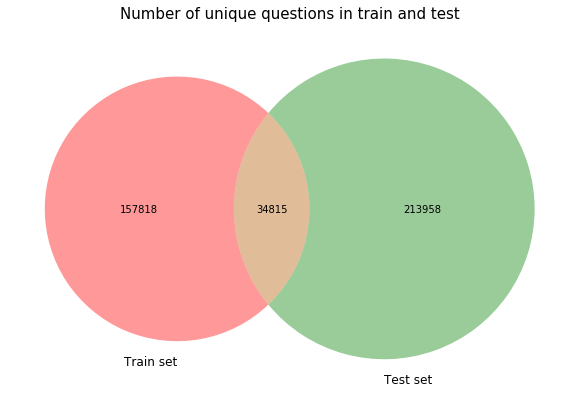

In [29]:
from matplotlib_venn import venn2
plt.figure(figsize=(10,7))
venn2([set(train_all_qids.values.tolist()), set(test_all_qids.values.tolist())], set_labels = ('Train set', 'Test set') )
plt.title("Number of unique questions in train and test", fontsize=15)
plt.show()

#### Now check the label distribution

In [30]:
train_df.head(5)

,label,q1,q2
0,1,Q397345,Q538594
1,0,Q193805,Q699273
2,0,Q085471,Q676160
3,0,Q189314,Q438123
4,0,Q267714,Q290126


In [31]:
label_cnt = pd.DataFrame(train_df["label"].value_counts())
label_cnt.columns = ["count"]
label_cnt["total"] = train_df.shape[0]*1.0
label_cnt["ratio"] = label_cnt["count"]/label_cnt["total"]
print label_cnt
## positive and negative samples are balanced

    count     total     ratio
1  132054  254386.0  0.519109
0  122332  254386.0  0.480891


## Feature engineering test

### tf_idf

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_corpus = question_df["words"]
char_corpus = question_df["chars"]

In [49]:
word_corpus.head(5)

0    W05733 W05284 W09158 W14968 W07863
1    W17378 W17534 W03249 W01490 W18802
2    W17378 W08158 W20171 W11246 W14759
3    W11385 W14103 W02556 W13157 W09749
4           W17508 W18238 W02952 W18103
Name: words, dtype: object

In [50]:
word_vectorizer = TfidfVectorizer(lowercase=False)
char_vectorizer = TfidfVectorizer(lowercase=False)
word_tdmatrix = word_vectorizer.fit_transform(word_corpus)
char_tdmatrix = char_vectorizer.fit_transform(char_corpus)

In [59]:
word_vectorizer_3 = TfidfVectorizer(lowercase=False,ngram_range=(1,5))
word_tdmatrix_3 = word_vectorizer_3.fit_transform(char_corpus)

In [60]:
word_tdmatrix_3.shape

(728428, 2900616)

In [54]:
word_tdmatrix_3.shape

(728428, 1046082)

In [56]:
from sklearn.decomposition import TruncatedSVD
word_svd_3 = TruncatedSVD(n_components=300,algorithm='randomized',n_iter=6)
word_svd_3_res = word_svd_3.fit_transform(word_tdmatrix_3)

In [57]:
word_svd_3_res.shape

(728428, 300)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,\
                                     polynomial_kernel,\
                                     sigmoid_kernel,\
                                     rbf_kernel,\
                                     laplacian_kernel,\
                                     chi2_kernel, \
                                     pairwise_distances
rbf_kernel(word_tdmatrix[0],word_tdmatrix[1])

In [ ]:
t1 = pd.Series(range(10))
t2 = pd.Series(range(10,-1,-1))
print zip(t1,t2)

In [ ]:
c = [b[0],b[1],b[2]]
print c
d = pd.DataFrame(c)
print d

In [ ]:
word_tdmatrix[0:1]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances

pairwise_distances(word_tdmatrix[0],word_tdmatrix[0],metric="cityblock")[0][0]

In [ ]:
class F(object):
    @staticmethod
    def reverse_dictionary(input_dict):
        """reverse the key-value pair into value-key pair"""
        return {v:k for k,v in input_dict.items()}

    @staticmethod
    def softmax(arr):
        e_x = np.exp(arr-np.max(arr))
        return e_x/np.sum(e_x)
F.softmax.__name__

In [ ]:
word_vectorizer2g = TfidfVectorizer(ngram_range=(1,2))

word_tdmatrix2g = word_vectorizer2g.fit_transform(word_corpus)


In [ ]:
word_vectorizer2g.vocabulary_
cnt=0
for k,v in word_vectorizer2g.vocabulary_.items():
    if " " not in k :
        cnt+=1
print cnt

In [ ]:
np.sum(b[0])

In [ ]:
q1words = question_df.iloc[0]["words"].split(" ")
q1word_index = [ word_vectorizer.vocabulary_[w] for w in q1words]
np.array(np.asarray(word_tdmatrix[0,q1word_index].todense()).ravel())

In [ ]:
char_tdmatrix.shape

In [ ]:
word_vectorizer.vocabulary_

In [ ]:
def reverse_dict(dic):
    return {v:k for k,v in dic.items()}

In [ ]:
len(reverse_dict(word_vectorizer.vocabulary_))

In [ ]:
from sklearn.decomposition import TruncatedSVD
word_svd = TruncatedSVD(n_components=300,algorithm='arpack')
word_svd_res = word_svd.fit_transform(word_tdmatrix)

In [ ]:
word_svd_res

In [ ]:
word_svd.components_

In [ ]:
word_svd.explained_variance_ratio_.sum()

In [ ]:
word_svd_res

In [ ]:
print word_embed_df.loc[["W00000","W00002"]].values

In [ ]:
a = pd.DataFrame(np.arange(16).reshape(4,4))
b = a.values
b.mean(axis=0)
b.sum(axis=0)

In [ ]:
b

In [ ]:
b[0,[1,2]]

In [ ]:
c = np.array([np.array([1,2]),np.array([3,4])])
c.shape

In [ ]:
question_df.iloc[0]["words"].split(" ")

In [ ]:
w = [1,0,2,0]
w = np.array(w).reshape(-1,1)

In [ ]:
w

In [ ]:
(b*w).mean(axis=0)

In [ ]:
b.mean(axis=0)

In [ ]:
W04465 W04058 W05284 W02916
W18238 W18843 W01490 W09905

In [ ]:
W12908 W19355 W08041 W06040 W18399 W01773 W16319
W12908 W06112 W08041 W17342

In [ ]:
from nltk import ngrams
def get_n_gram(s,n):
    grams = ngrams(s.split(), n)
    grams = [' '.join(x) for x in grams]
    return grams
print get_n_gram("I love I you",5)

In [ ]:
400000*400000*4/1024/1024/1024


In [ ]:
question_df_test = pd.read_csv(question_path,index_col=0)

In [ ]:
question_df_test["chars"]

In [ ]:
question_df_test

In [ ]:
from scipy.spatial import distance
distance.canberra([1, 0, 0], [0, 1, 0])

In [ ]:
a=[]
a.extend(np.array([1,2,3,4]))
a

In [ ]:
from math import mean

In [ ]:
class F(object):
    class common_n(object):
        def __init__(self,n):
            self.n = n
            self.__name__="aadf" + str(n)
        def __call__(self,m):
            print self.n+m
a = F.common_n(45)
print a.__name__
a(55)

In [ ]:
b=F.common_n(3)
print b.__name__
b(4)

In [ ]:
def common_n_gram(n):
    n = n
    def add(m):
        print n+m
    return add

In [ ]:
a=common_n_gram(4)

In [ ]:
def rename(newname):
    def decorator(f):
        f.__name__ = newname
        return f
    return decorator

In [ ]:
a=rename("aaa")(a)

In [ ]:
a(5)

In [ ]:
a.__name__

In [ ]:
import string 
string.printable

In [ ]:
def levenshtein(s1, s2):
        if len(s1) < len(s2):
            return levenshtein(s2, s1)

        # len(s1) >= len(s2)
        if len(s2) == 0:
            return len(s1)

        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1  # j+1 instead of j since previous_row and current_row are one character longer
                deletions = current_row[j] + 1  # than s2
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

In [ ]:
levenshtein("bM","bmfff")

In [ ]:
a={}
a.setdefault(1,2)

In [ ]:
a

In [ ]:
a.setdefault(1,3)

In [ ]:
c = np.array(c)

In [ ]:
c

In [ ]:
c.min(axis=1).sum()

In [ ]:
word_embed_df.loc[["W20875"]].values

In [37]:
a = pd.DataFrame(np.arange(16).reshape(4,4))
b = pd.DataFrame(np.arange(16).reshape(4,4))

In [38]:
a.index=[0,1,2,3]

In [39]:
b

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [40]:
pd.concat([a,b],ignore_index=True,axis=1)

,0,1,2,3,4,5,6,7
0,0,1,2,3,0,1,2,3
1,4,5,6,7,4,5,6,7
2,8,9,10,11,8,9,10,11
3,12,13,14,15,12,13,14,15


In [173]:
from torch.utils.data import Dataset, DataLoader
class PaddedTensorDataset(Dataset):
    def __init__(self, data_tensor, target_tensor):
        assert len(data_tensor)==len(target_tensor)
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor

    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

    def __len__(self):
        return len(self.data_tensor)
def generate():
    l1 = [1,2,3,4]
    l2 = [3,4,5,6]
    l3 = [5,6,7,8]
    l = [l1,l2,l3]
    a = [0,1]
    for ind in a:
        print ind
        li = l[ind]
        li1 = l[ind+1]
        print li
        for r in torch.utils.data.DataLoader(PaddedTensorDataset(li,li1),batch_size=2,shuffle=True):
            yield r

In [174]:
my_generate = generate()


In [175]:
for i1,i2 in my_generate:
    print i1,i2
    

0
[1, 2, 3, 4]
tensor([ 2,  3]) tensor([ 4,  5])
tensor([ 4,  1]) tensor([ 6,  3])
1
[3, 4, 5, 6]
tensor([ 5,  3]) tensor([ 7,  5])
tensor([ 4,  6]) tensor([ 6,  8])


In [176]:
x = generate()
for ii in x:
    print ii

0
[1, 2, 3, 4]
[tensor([ 3,  1]), tensor([ 5,  3])]
[tensor([ 2,  4]), tensor([ 4,  6])]
1
[3, 4, 5, 6]
[tensor([ 3,  5]), tensor([ 5,  7])]
[tensor([ 6,  4]), tensor([ 8,  6])]


In [178]:
a = pd.DataFrame(np.arange(16).reshape(4,4),index=["a","b","c","d"],columns=["a","b","c","d"])
a

,a,b,c,d
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [182]:
term_embed = DataSet.load_term_embed("words")
pad = np.array([0]*300).reshape(1,-1)
all_emb = np.vstack([pad,term_embed])

In [183]:
all_emb

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1693155 , -0.06389757,  0.11528583, ..., -0.12778564,
         0.11059313, -0.1710843 ],
       [ 1.54821229, -1.05277574,  1.1926316 , ..., -1.46445835,
        -0.3617923 ,  0.94332248],
       ..., 
       [ 0.50905675,  0.06827735, -0.45803377, ...,  0.24286361,
        -0.37945619, -0.39816865],
       [-2.19903612, -0.4767417 ,  0.80386728, ...,  3.24631023,
         1.89588535, -5.07398033],
       [ 3.32320619, -1.03367436, -1.71298325, ..., -0.37402841,
         0.27100787, -0.45834464]])

In [189]:
all_emb_df = pd.DataFrame(all_emb,index=["pad"]+term_embed.index.values.tolist())

In [192]:
all_emb_df.loc[["W00003","W00000","W00001"]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
W00003,-1.407966,0.034697,-2.333980,1.991531,-0.073803,-0.966899,-0.926573,-2.161519,0.961513,0.382619,...,0.547399,1.300992,1.893234,0.833304,-0.531153,1.249110,-0.959852,2.486905,0.925652,-0.676427
W00000,0.169316,-0.063898,0.115286,-0.077671,0.067184,0.019339,0.039596,-0.026229,-0.160078,-0.054329,...,0.061151,0.044519,-0.194827,0.122456,0.122785,-0.154153,-0.116578,-0.127786,0.110593,-0.171084
W00001,1.548212,-1.052776,1.192632,0.760363,1.594398,1.478917,-1.555349,0.401968,1.588316,2.460358,...,-1.898932,0.129864,-2.062325,0.068316,0.540282,-1.682620,-0.816290,-1.464458,-0.361792,0.943322


In [16]:
from feature_engineering.util import DataSet
import sys
sys.path.append("../")
from feature_engineering.util import *
from Siamese_CNN_v1.data import *

In [17]:
dl = DataGenerator()

Generating intermediate files...
for words
for chars
finish generating inter files.
begin caching..
finish caching


In [18]:
train = DataSet.load_train()
from sklearn.model_selection import train_test_split

xtr, xte = train_test_split(train, test_size=0.33)

In [19]:
xtr.shape

(170438, 7)

In [24]:
dl.prepare(xtr,5,"words",True,False)

prepare necessary data...
170438
prepare done.


In [21]:
tr_g = dl.get_data_generator(True,20)

In [27]:
dl.buckets.keys()

dict_keys([0, 2, 3, 1, 4])

In [25]:
min(dl.bounds)

5

In [22]:
d,i,l = next(tr_g)

In [23]:
d

tensor([[   30,     6,    80,    25,    88,   102,   458,     0,     0,
            57,    88,     6,    40,    80],
        [    0,     0,   164,    18,    40,    60,  9689,    35,   324,
           158,   761,   641,   362,  1287],
        [   85,   763,    87,     6,    25,     9,   255,     9,    24,
            25,   173,    16,    33,   138],
        [   20,   238,   622,   227,    24,    37,    10,     0,     0,
             6,   187,    44,    37,   457],
        [    0,     0,     0,   321,   188,   102,    80,     6,     7,
           138,   147,    73,    25,  1468],
        [    0,     0,     0,  1028,   757,    59,  1029,    55,  1709,
            25,    19,   216,   217,    10],
        [   88,     2,     3,  1642,   742,  1845,     9,     0,     0,
             0,    82,   691,   458,    66],
        [    0,     0,     6,     2,     3,    60,    29,    99,     1,
           288,   104,   171,    65,    60],
        [    0,   155,   156,   126,   267,   617,     5,   484,

In [24]:
i

tensor([ 0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  0,  1,  1,  1,  0])

In [25]:
l

tensor([ 2.3230e+03,  5.3238e+04,  6.5379e+04,  4.1425e+04,  1.6250e+05,
         4.7647e+04,  1.3221e+05,  6.2131e+04,  4.2490e+03,  5.7411e+04,
         4.9080e+04,  6.2289e+04,  7.9331e+04,  4.9267e+04,  1.5516e+05,
         3.5942e+04,  3.4103e+04,  1.0099e+05,  4.1770e+04,  1.6073e+05])

In [38]:
l.numpy()

array([  2323,  53238,  65379,  41425, 162503,  47647, 132209,  62131,
         4249,  57411,  49080,  62289,  79331,  49267, 155158,  35942,
        34103, 100986,  41770, 160734])

In [39]:
first = xtr.iloc[35942]
first

label                0
q1             Q204863
q2             Q355735
word_len_q1          7
word_len_q2          6
char_len_q1         14
char_len_q2         11
Name: 221302, dtype: object

In [41]:
w2i = dl.q2idvec["words"]
w2i["Q355735"]

array([ 458,  126,  984,  155,  156, 2581])

In [36]:
w2i = dl.item2idx["words"]
w2i["Q254679"]
i2w = dl.idx2item["words"]
print([i2w[j] for j in w2v["Q018529"]])

['W17378', 'W08924', 'W18399', 'W05733', 'W16319']


In [45]:
ie = dl.item_embed["words"]
torch.Tensor(ie).dtype

torch.float32

In [241]:
    dl = DataGenerator()
    train = DataSet.load_train()
    from sklearn.model_selection import train_test_split

    xtr, xte = train_test_split(train, test_size=0.33)
    dl.prepare(xtr[:10], 2, "words", True, False)
    tr_g = dl.get_data_generator(True, 20)
    d,i,l = next(tr_g)


detect cached intermediate files...loading...
finish
prepare necessary data...
prepare done.


In [10]:
a=[1,2,4]
np.random.shuffle(a)
a

[2, 1, 4]

In [243]:
d

tensor([[     0,    191,    366,    301,     56,     40,    460,      0,
              6,     25,     20,    578,    267,     37],
        [     0,      0,      0,      0,    267,    173,      9,    666,
            782,    666,     40,   1333,     21,    546],
        [     0,     89,      1,    355,     16,  18999,     23,      0,
              0,      0,      1,    101,     33,    197],
        [     0,    730,     16,     25,      6,     97,    169,      0,
              0,      0,      0,     70,     45,   4190],
        [     0,      0,      0,    321,     55,    449,     10,      0,
              0,      6,    321,    643,     37,     10],
        [     0,      0,     19,    461,    914,   1330,     78,      0,
              0,      0,     41,   1370,      9,      5]])

In [244]:
i

tensor([ 5,  8,  2,  6,  4,  1])

In [245]:
l

tensor([ 0,  0,  0,  0,  1,  0])

In [255]:
first = x.iloc[1]
first

label                0
q1             Q137119
q2             Q240144
word_len_q1          5
word_len_q2          4
char_len_q1         11
char_len_q2          7
Name: 226285, dtype: object

In [256]:
w2v = dl.q2idvec["words"]
w2v["Q137119"]

array([  19,  461,  914, 1330,   78])

In [22]:
a1 = np.arange(4)
a2 = np.arange(5)
a3 = np.arange(5)

In [25]:
a = np.array([a1,a2,a3])

In [29]:
np.array(a[[1,2]].tolist())

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [30]:
np.vstack(a[[1,2]].tolist())

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [36]:
np.pad(a1,(3,0),"constant")

array([0, 0, 0, 0, 1, 2, 3])

In [54]:
question_df =DataSet.load_all_questions()

In [57]:
question_df.loc["Q000000"]["words"].split()

['W05733', 'W05284', 'W09158', 'W14968', 'W07863']

In [38]:
np.arange(6)[4:5].tolist()

[4]

In [41]:
np.arange(16)[[4]]

array([4])

In [61]:
torch.LongTensor(np.arange(100).reshape(10,10))

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99]])

In [2]:
from __future__ import print_function
import torch
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch import nn as nn, autograd
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

In [48]:
output.size()

torch.Size([20, 33, 24])

In [56]:
emb = nn.Embedding(100,300).to(device)

In [50]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [52]:
ind = torch.tensor([1,2,3],device=device)

In [53]:
ind

tensor([ 1,  2,  3], device='cuda:0')

In [57]:
emb(ind)

tensor([[ 1.8470, -0.9276,  0.0931,  1.2230,  0.7910,  0.6080, -1.5063,
          0.5206, -0.0123,  2.3572,  0.2837,  0.0499, -0.7266, -0.1512,
         -0.1555,  0.5903, -0.3212, -1.0274,  1.1650,  1.9632,  0.3779,
         -0.4522,  1.7000, -1.4515,  0.3225,  0.6467, -0.5869, -1.0003,
         -0.0010, -0.7702,  0.3531, -1.1329,  1.1147,  0.0228,  1.0410,
          1.2058, -1.2394, -0.8727,  0.3079, -0.1404, -0.5976,  0.8726,
          1.1650,  0.0449, -1.8714,  0.4372, -0.4673, -0.8764,  1.4860,
          0.3939,  1.0528,  1.0253, -0.1318,  0.1264,  0.2587, -0.6842,
          0.1966,  0.8802, -0.3537,  1.1634,  0.8788, -0.1731,  1.4567,
          0.1510, -0.2094, -0.9874, -0.4124, -0.4357, -0.1512,  1.0608,
          0.6473, -0.5726, -0.9418,  1.2943,  0.4659, -0.2135,  1.1054,
          0.1888, -0.1277, -0.4297,  1.6927, -1.8200,  0.0844,  0.4832,
         -0.9614, -0.4435, -2.5424, -0.2292,  2.4410,  1.4959, -1.0767,
         -0.6349,  0.3535,  1.2079,  0.9265, -0.2040, -1.3885,  

In [58]:
emb

Embedding(100, 300)

In [61]:
a=nn.Embedding.from_pretrained(torch.from_numpy(np.arange(100).reshape(4,25)))

In [62]:
a

Embedding(4, 25)

In [64]:
a.to(device)(ind)

tensor([[ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
          37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
          62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
          74],
        [ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
          87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99]], device='cuda:0')

In [3]:
import torch
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch import nn as nn, autograd
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
m = nn.Conv1d(16, 33, 3, stride=1,padding=2)
input = torch.randn(20, 16, 20)
output = m(input)

In [54]:
output.size()

torch.Size([20, 33, 22])

In [35]:
o1,i1 = output.min(dim=2)

In [37]:
o1.size()

torch.Size([20, 33])

In [43]:
t1

tensor([[[ 0.7892, -0.3451,  1.8338],
         [ 0.8489, -0.2442, -0.0187],
         [ 0.1200, -1.5486, -0.9798],
         [-0.5707,  0.7858, -0.1370],
         [ 0.6631,  0.6791,  1.0186]],

        [[ 0.8755,  1.3299,  0.5942],
         [-0.9820, -1.2202, -0.7314],
         [ 1.1004, -0.1884, -0.4746],
         [ 0.5637,  0.0867,  0.0233],
         [ 0.1792, -0.5005,  2.9899]],

        [[-0.3974, -0.7109,  0.3255],
         [-0.2458,  0.7731,  0.5312],
         [-1.0141,  0.7547,  0.3522],
         [ 1.4644,  0.2728, -1.8316],
         [ 0.8586, -0.2770, -0.1837]],

        [[ 0.3913,  1.1858, -1.4550],
         [-0.5383, -0.0255,  0.3648],
         [ 0.0108,  0.1248, -0.1407],
         [ 0.3428,  1.7145, -0.6449],
         [-1.3177, -0.1572, -0.3421]]])

In [38]:
t1 = torch.randn(4,5,3,requires_grad=True)
t2,i2 = t1.min(dim=2)


In [50]:
t2.size()

torch.Size([4, 5])

In [44]:
t2.backward(torch.ones_like(t2))

In [45]:
t1.grad

tensor([[[ 0.,  1.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  1.,  0.],
         [ 1.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  1.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  1.],
         [ 0.,  1.,  0.]],

        [[ 0.,  1.,  0.],
         [ 1.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  1.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  1.],
         [ 1.,  0.,  0.]]])

In [4]:
from __future__ import print_function
import torch
import numpy as np
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch import nn as nn, autograd
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
m = nn.ReLU()
input = torch.randn(2)
output = m(input)

In [6]:
output

tensor([ 0.,  0.])

In [7]:
def test(*arg):
    print(arg)
test(4)

(4,)


In [19]:
t1 = torch.Tensor(np.arange(500).reshape(5,-1))
t1.requires_grad

False

In [20]:
a1,a2 = torch.chunk(t1, 2, dim=1)

In [21]:
a1.size()

torch.Size([5, 50])

In [22]:
a2.size()

torch.Size([5, 50])

In [23]:
a1.requires_grad

False

In [33]:
embeds = nn.Embedding(100,300)
q1 = torch.LongTensor(np.arange(30).reshape(5,-1))

In [34]:
q1.size()

torch.Size([5, 6])

In [35]:
q1

tensor([[  0,   1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11],
        [ 12,  13,  14,  15,  16,  17],
        [ 18,  19,  20,  21,  22,  23],
        [ 24,  25,  26,  27,  28,  29]])

In [36]:
o1 = embeds(q1)
o1.size()

torch.Size([5, 6, 300])

In [37]:
o2 = o1.transpose(1,2)

In [39]:
o2.size()

torch.Size([5, 300, 6])

In [42]:
m = nn.Conv1d(300, 100, 3, stride=1,padding=1)
o3=m(o2)
o3.size()

torch.Size([5, 100, 6])

In [44]:
o4,_ = o3.min(dim=2)

In [45]:
o4.size()

torch.Size([5, 100])

In [ ]:
h1 = nn.Linear(100,1)
in1 = torch.tensor(np.arange())

In [48]:
300*100*4*4*3/1024/1024

1.373291015625

In [49]:
1000*10*300*4/1024/1024

11.444091796875

In [24]:
m = nn.Sigmoid()
loss = nn.BCELoss(size_average=False)
loss1 = nn.BCEWithLogitsLoss(size_average=False)
input = torch.randn((3,1), requires_grad=True)
target = torch.empty(3,1).random_(2)


In [25]:
output = loss(m(input), target)
output1 = loss1(input,target)

In [26]:
print(output)
print(output1)

tensor(2.0621)
tensor(2.0621)


In [28]:
input

tensor([[-0.4609],
        [ 0.2551],
        [ 0.5402]])

In [27]:
target

tensor([[ 0.],
        [ 1.],
        [ 0.]])

In [6]:
x = torch.tensor([1], requires_grad=True)
is_train = False
with torch.set_grad_enabled(is_train):
     y = x * 2
y.requires_grad



False

In [7]:
z = x+3
z.requires_grad

True

In [8]:
torch.set_grad_enabled(False)

In [9]:
z1=x+45
z1.requires_grad

False

In [10]:
torch.set_grad_enabled(True)

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [89]:

import sys
sys.path.append("../")
from feature_engineering.util import *
from Siamese_CNN_v5.data import *
from Siamese_CNN_v5.model import *

In [90]:
    SPACE = "words" ##TODO put parameters here
    OUT_CHANS = 100

    train_df = DataSet.load_train()
    xtr_df, xval_df = train_test_split(train_df, test_size=0.25)
    test_df = DataSet.load_test()
    ### Generate data generator
    train_dg = DataGenerator(data_df=xtr_df,space=SPACE,bucket_num=5,batch_size=5000,is_prefix_pad=True,is_shuffle=True,is_test=False)
    val_dg = DataGenerator(data_df=xval_df,space=SPACE,bucket_num=5,batch_size=5000,is_prefix_pad=True,is_shuffle=False,is_test=False)
    test_dg = DataGenerator(data_df=test_df,space=SPACE,bucket_num=5,batch_size=5000,is_prefix_pad=True,is_shuffle=False,is_test=True)
    ### Must do prepare before using
    train_dg.prepare()
    val_dg.prepare()
    test_dg.prepare()
    ### load word embedding, can use train_df, val_dg or test_dg
    item_embed = train_dg.get_item_embed_tensor(SPACE)
    ### Initialize network
    siamese_cnn = Siamese_CNN(item_embed,is_freeze=True,output_channels=OUT_CHANS)

detect cached intermediate files...loading...
finish
detect cached intermediate files...loading...
finish
detect cached intermediate files...loading...
finish
prepare necessary data...
190789
prepare done.
prepare necessary data...
63597
prepare done.
prepare necessary data...
172956
prepare done.


In [91]:
print(siamese_cnn)

Siamese_CNN(
  (nn_Embedding): Embedding(20891, 300)
  (similarity): Similarity()
  (dropout): Dropout(p=0.4)
  (conv1d_size2): Conv1d(300, 100, kernel_size=(2,), stride=(1,), padding=(1,))
  (conv1d_size3): Conv1d(300, 100, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv1d_size4): Conv1d(300, 100, kernel_size=(4,), stride=(1,), padding=(1,))
  (out_hidden1): Linear(in_features=601, out_features=300, bias=True)
  (out_hidden2): Linear(in_features=300, out_features=150, bias=True)
  (out_put): Linear(in_features=150, out_features=1, bias=True)
)


In [119]:
siamese_cnn.parameters()

<generator object parameters at 0x7f059a4ae870>

In [107]:
for i in ifilter(lambda p: p.requires_grad, siamese_cnn.parameters()):
    print(i)

Parameter containing:
tensor([[ 1.0255e+00,  1.8078e+00,  2.2743e+00,  ...,  1.3056e+00,
          7.0823e-02, -5.5302e-01],
        [ 1.3441e+00, -9.0772e-01, -5.9796e-01,  ..., -8.2462e-01,
         -9.5950e-01,  7.7132e-01],
        [-2.0473e-01, -3.8335e-01,  8.0004e-01,  ...,  8.8740e-01,
         -2.1423e+00,  1.2046e+00],
        ...,
        [-8.0980e-01, -1.0161e+00, -2.9748e+00,  ...,  1.5406e-01,
          4.6483e-01, -2.0363e-01],
        [-1.9270e+00, -5.6139e-01,  1.9338e+00,  ...,  7.2608e-01,
         -6.2481e-01,  3.4994e-01],
        [-1.4013e+00, -6.3311e-01, -1.0701e+00,  ..., -1.3603e+00,
          9.5666e-01,  5.6746e-01]])
Parameter containing:
tensor(1.00000e-02 *
       [[[ 3.1472,  1.0325],
         [ 3.4459,  3.8509],
         [ 3.4140,  1.7923],
         ...,
         [ 2.0448, -1.9401],
         [ 2.5886,  1.6185],
         [-1.4538, -1.3277]],

        [[-2.1015, -3.3959],
         [-3.5021, -1.2726],
         [-1.7383,  1.3204],
         ...,
         [-3

In [124]:
for p in siamese_cnn.similarity.parameters():
    print(p)

Parameter containing:
tensor([[ 1.0255e+00,  1.8078e+00,  2.2743e+00,  ...,  1.3056e+00,
          7.0823e-02, -5.5302e-01],
        [ 1.3441e+00, -9.0772e-01, -5.9796e-01,  ..., -8.2462e-01,
         -9.5950e-01,  7.7132e-01],
        [-2.0473e-01, -3.8335e-01,  8.0004e-01,  ...,  8.8740e-01,
         -2.1423e+00,  1.2046e+00],
        ...,
        [-8.0980e-01, -1.0161e+00, -2.9748e+00,  ...,  1.5406e-01,
          4.6483e-01, -2.0363e-01],
        [-1.9270e+00, -5.6139e-01,  1.9338e+00,  ...,  7.2608e-01,
         -6.2481e-01,  3.4994e-01],
        [-1.4013e+00, -6.3311e-01, -1.0701e+00,  ..., -1.3603e+00,
          9.5666e-01,  5.6746e-01]])


In [123]:
len(list(siamese_cnn.similarity.parameters()))

1

In [116]:
a.data.type()

'torch.FloatTensor'

In [126]:
a = torch.ones(2,2)+1

In [127]:
a

tensor([[ 2.,  2.],
        [ 2.,  2.]])

In [128]:
torch.sum(a*a)

tensor(16.)

In [129]:
a*a

tensor([[ 4.,  4.],
        [ 4.,  4.]])

In [131]:
a**2

tensor([[ 4.,  4.],
        [ 4.,  4.]])

In [132]:
torch.sum(a)

tensor(8.)

In [14]:
lstm = nn.LSTM(input_size=10,hidden_size=5,num_layers=1,batch_first=True,bidirectional=False)
h0 = torch.randn(4,20,5)
c0 = torch.randn(4,20,5)
inputs = torch.randn(20,7,10)
out,hid = lstm(inputs)

In [15]:
out.size()

torch.Size([20, 7, 5])

In [16]:
h = hid[0]
c = hid[1]

In [17]:
h.size()

torch.Size([1, 20, 5])

In [18]:
c.size()

torch.Size([1, 20, 5])

In [23]:
print(out[:,-1,:])

tensor([[ 0.0495,  0.1033, -0.2530,  0.0095, -0.2906],
        [ 0.0331,  0.3184, -0.2799, -0.0406,  0.1520],
        [ 0.0220,  0.1209, -0.0747, -0.1951, -0.1561],
        [-0.0427, -0.3087, -0.2344, -0.0660, -0.0321],
        [-0.0831, -0.2304, -0.1023, -0.1059, -0.1412],
        [-0.0585, -0.0680, -0.3159,  0.1783, -0.3830],
        [-0.0841,  0.1122, -0.0884,  0.0777, -0.1609],
        [-0.2794,  0.2762,  0.0440, -0.0748, -0.0186],
        [ 0.0089, -0.1019, -0.2082, -0.0058, -0.2231],
        [ 0.0735,  0.1928, -0.2928,  0.1294, -0.1154],
        [ 0.1423,  0.3560,  0.1513, -0.2256,  0.0277],
        [ 0.0252,  0.2337, -0.1865, -0.0429,  0.0159],
        [-0.0677,  0.1123,  0.0224,  0.0028, -0.3450],
        [ 0.0592, -0.2298, -0.1193, -0.0601, -0.4578],
        [-0.0306,  0.2824,  0.0892,  0.0688, -0.0118],
        [-0.0317,  0.0452, -0.0280,  0.0445, -0.0710],
        [-0.0975,  0.2907,  0.1177, -0.0019, -0.0046],
        [ 0.0671,  0.0952, -0.1332, -0.0510, -0.1402],
        [-

In [25]:
print(h.squeeze(0))

tensor([[ 0.0495,  0.1033, -0.2530,  0.0095, -0.2906],
        [ 0.0331,  0.3184, -0.2799, -0.0406,  0.1520],
        [ 0.0220,  0.1209, -0.0747, -0.1951, -0.1561],
        [-0.0427, -0.3087, -0.2344, -0.0660, -0.0321],
        [-0.0831, -0.2304, -0.1023, -0.1059, -0.1412],
        [-0.0585, -0.0680, -0.3159,  0.1783, -0.3830],
        [-0.0841,  0.1122, -0.0884,  0.0777, -0.1609],
        [-0.2794,  0.2762,  0.0440, -0.0748, -0.0186],
        [ 0.0089, -0.1019, -0.2082, -0.0058, -0.2231],
        [ 0.0735,  0.1928, -0.2928,  0.1294, -0.1154],
        [ 0.1423,  0.3560,  0.1513, -0.2256,  0.0277],
        [ 0.0252,  0.2337, -0.1865, -0.0429,  0.0159],
        [-0.0677,  0.1123,  0.0224,  0.0028, -0.3450],
        [ 0.0592, -0.2298, -0.1193, -0.0601, -0.4578],
        [-0.0306,  0.2824,  0.0892,  0.0688, -0.0118],
        [-0.0317,  0.0452, -0.0280,  0.0445, -0.0710],
        [-0.0975,  0.2907,  0.1177, -0.0019, -0.0046],
        [ 0.0671,  0.0952, -0.1332, -0.0510, -0.1402],
        [-

In [10]:
h

tensor([[[-0.0461, -0.2592,  0.3338,  0.1102, -0.4053],
         [ 0.0153, -0.2765, -0.1733,  0.6821, -0.1313],
         [-0.0843, -0.2292,  0.0025,  0.1009, -0.2467],
         [-0.1546,  0.0486,  0.2205,  0.0835, -0.2264],
         [-0.0036, -0.3140,  0.4605,  0.3125, -0.1802],
         [-0.0673,  0.3474,  0.0396,  0.1301, -0.0967],
         [-0.0620,  0.1583,  0.0151,  0.2666, -0.3351],
         [-0.0688, -0.1872, -0.0827,  0.0694, -0.3664],
         [ 0.1379, -0.1694,  0.1676,  0.1021, -0.4021],
         [ 0.1923, -0.0649, -0.1900,  0.0684, -0.1727],
         [-0.0115, -0.2515, -0.1895,  0.4816, -0.3217],
         [ 0.0309, -0.1008,  0.0724, -0.2572, -0.2335],
         [ 0.0121, -0.2337, -0.0433,  0.1270, -0.4273],
         [-0.0513, -0.0773,  0.2406, -0.3492, -0.4260],
         [ 0.4234, -0.3755,  0.2469,  0.2975, -0.3029],
         [-0.0251,  0.2972, -0.3163, -0.1394,  0.3350],
         [-0.0085, -0.1044,  0.3291, -0.0873, -0.2590],
         [-0.1312,  0.1565,  0.1767,  0.2281, -0

In [54]:
res = torch.cat((h[-2],h[-1]),dim=1)
res

tensor([[-0.1167, -0.0486, -0.0926,  0.0585, -0.0937,  0.0089,  0.0154,
          0.2673, -0.1137, -0.2393],
        [-0.1779, -0.1279, -0.0552,  0.0294, -0.1173, -0.0119,  0.0415,
          0.2865, -0.0854, -0.2346],
        [-0.1032, -0.1595, -0.1001,  0.0918, -0.1045, -0.0334,  0.0285,
          0.2398, -0.0978, -0.2481],
        [-0.1681,  0.0072, -0.0878,  0.1031, -0.0787, -0.1171,  0.0150,
          0.2342, -0.1243, -0.2661],
        [-0.0931, -0.1635, -0.0919,  0.1355, -0.0848, -0.0095,  0.0613,
          0.2820, -0.1437, -0.2554],
        [-0.0551, -0.1250, -0.0937,  0.0724, -0.1079, -0.0058,  0.0807,
          0.2941, -0.1318, -0.2602],
        [-0.0295, -0.0647, -0.1068,  0.0468, -0.0917, -0.1203,  0.0410,
          0.2419, -0.1351, -0.2727],
        [-0.0298, -0.0994, -0.0991, -0.0039, -0.1015, -0.0640,  0.0476,
          0.2835, -0.1264, -0.2363],
        [-0.1795, -0.1085, -0.0890,  0.1116, -0.0767,  0.0525,  0.0890,
          0.3180, -0.1515, -0.2681],
        [-0.1725, -

In [55]:
res.size()

torch.Size([20, 10])

In [39]:
0.98**100*1

0.13261955589475294

In [28]:
0.999**150

0.8606433826830363

In [40]:
a = np.arange(100)
b = np.arange(100,1,-1)

In [56]:
0.001*(0.99**40)


0.0006689717585696802